## Kidney Disease Identification Using AutoML
We have already made an end-to-end machine learning model to identify kidney disease. In this notebook, we'll make a machine learning model by applying an AutoML Library, named as Eval ML, using Python.

In [65]:
import evalml
from evalml.automl import AutoMLSearch
import numpy as np
import pandas as pd
import seaborn as sns

In [66]:
data = pd.read_csv('kidney_disease.csv')

In [67]:
data.head(4)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


In [68]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [70]:
# data = data.drop('Unnamed: 0', axis=1)

In [71]:
data.shape

(400, 26)

In [72]:
data.isnull().sum().to_numpy()

array([  0,   9,  12,  47,  46,  49, 152,  65,   4,   4,  44,  19,  17,
        87,  88,  52,  70, 105, 130,   2,   2,   2,   1,   1,   1,   0],
      dtype=int64)

In [76]:
Y[:4]

0    ckd
1    ckd
2    ckd
3    ckd
Name: classification, dtype: object

In [78]:
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [79]:
data['classification'] = data['classification'].replace(to_replace={'ckd\t': 'ckd', 'ckd': 'ckd', 'notckd': 'not ckd'})

In [80]:
data['classification'].value_counts()

ckd        250
not ckd    150
Name: classification, dtype: int64

<AxesSubplot:xlabel='classification', ylabel='count'>

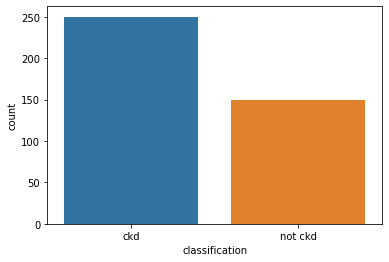

In [81]:
sns.countplot(data['classification'])

In [88]:
X = data.drop('classification', axis=1)
Y = data['classification']

In [90]:
Y.value_counts()

ckd        250
not ckd    150
Name: classification, dtype: int64

In [91]:
# split into train/val sets through eval ml
X_train, X_test, Y_train, Y_test = evalml.preprocessing.split_data(X, 
                                                                   Y, 
                                                                   problem_type="binary")

In [92]:
# apply auto machine learning
auto_ml_search = AutoMLSearch(X_train=X_train, 
                      y_train=Y_train, 
                      problem_type='binary')

In [93]:
auto_ml_search

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
# search for best model pipelines
auto_ml_search.search()

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Drop Columns Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder may not perform as estimated on unseen data.


In [96]:
auto_ml_search.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Logistic Regression Classifier w/ Label Encode...,1,0.029896,0.010835,0.029896,99.769184,False,"{'Label Encoder': {'positive_label': None}, 'D..."
1,3,Logistic Regression Classifier w/ Label Encode...,3,0.031444,0.009665,0.031444,99.757231,False,"{'Label Encoder': {'positive_label': None}, 'D..."
2,6,LightGBM Classifier w/ Label Encoder + Select ...,6,0.032861,0.056732,0.032861,99.746295,False,"{'Label Encoder': {'positive_label': None}, 'N..."
3,10,XGBoost Classifier w/ Label Encoder + Select C...,10,0.037516,0.045206,0.037516,99.710354,False,"{'Label Encoder': {'positive_label': None}, 'N..."
4,4,Random Forest Classifier w/ Label Encoder + Dr...,4,0.038481,0.004923,0.038481,99.702904,False,"{'Label Encoder': {'positive_label': None}, 'D..."
5,8,Elastic Net Classifier w/ Label Encoder + Sele...,8,0.038602,0.009398,0.038602,99.701970,False,"{'Label Encoder': {'positive_label': None}, 'N..."
6,2,Random Forest Classifier w/ Label Encoder + Dr...,2,0.042879,0.003552,0.042879,99.668945,False,"{'Label Encoder': {'positive_label': None}, 'D..."
7,7,Extra Trees Classifier w/ Label Encoder + Sele...,7,0.095402,0.009042,0.095402,99.263432,False,"{'Label Encoder': {'positive_label': None}, 'N..."
8,9,CatBoost Classifier w/ Label Encoder + Select ...,9,0.333710,0.004714,0.333710,97.423547,False,"{'Label Encoder': {'positive_label': None}, 'N..."
9,5,Decision Tree Classifier w/ Label Encoder + Se...,5,0.660669,0.626067,0.660669,94.899216,True,"{'Label Encoder': {'positive_label': None}, 'N..."


In [97]:
# get the best pipeline
auto_ml_search.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Drop Columns Transformer': ['Drop Columns Transformer', 'X', 'Label Encoder.y'], 'Imputer': ['Imputer', 'Drop Columns Transformer.x', 'Label Encoder.y'], 'One Hot Encoder': ['One Hot Encoder', 'Imputer.x', 'Label Encoder.y'], 'Standard Scaler': ['Standard Scaler', 'One Hot Encoder.x', 'Label Encoder.y'], 'Logistic Regression Classifier': ['Logistic Regression Classifier', 'Standard Scaler.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Drop Columns Transformer':{'columns': ['wc']}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder':{'top_n': 10, 'features_to_encode': None, 'categories': None, 'drop': 'if_binary', 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'Logistic Regression Classifier':{'penalty': 'l2', 'C': 1.0, 'n_j

In [98]:
# describe briefly the best pipeline
auto_ml_search.describe_pipeline(auto_ml_search.rankings.iloc[0]['id'])


****************************************************************************************************************************
* Logistic Regression Classifier w/ Label Encoder + Drop Columns Transformer + Imputer + One Hot Encoder + Standard Scaler *
****************************************************************************************************************************

Problem Type: binary
Model Family: Linear

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Drop Columns Transformer
	 * columns : ['wc']
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
4. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
5. Standard Scaler
6. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1
	 * multi_class : auto
	 * solver : lbfgs

Training
Tra

In [99]:
best_pipeline = auto_ml_search.best_pipeline
# best_pipeline

In [100]:
# evaluation of machine learning model on validation/test dataset
best_pipeline.score(X_test, Y_test, objectives=['auc', 'f1', 'Precision', 'Recall'])

OrderedDict([('AUC', 1.0),
             ('F1', 0.983050847457627),
             ('Precision', 1.0),
             ('Recall', 0.9666666666666667)])

- After applying automated machine learning (AutoML) on kidney dataset, we have now arrived at a point where we have calculated the best model pipeline that gives us the maximum accuracy (99.9%) on testing dataset

- By applying AutoML, we don't need to calculate or manualy go through data preprocessing steps like feature engineering, extraction, selection, imputation, etc., the Eval ML library will find the best pipeline for us automatically. 

- The best model that we have found is the Gradient Boosting Machine (Light GBM), following the data preprocessing steps.

In [39]:
# search best model pipeline for a specific set of targets
import time
start = time.time()

advanced_search = AutoMLSearch(X_train=X_train, 
                      y_train=Y_train, 
                      problem_type='binary',
                      objective='precision',
                      additional_objectives = ['f1'],
                      optimize_thresholds=True,
                      max_batches=1)
end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

Time Taken: 0.018 seconds


In [38]:
# evalml.objectives.utils.get_core_objective_names()

In [30]:
# apply search
advanced_search.search()

In [32]:
# get the best pipeline
best_pipe = advanced_search.best_pipeline

In [33]:
advanced_search.describe_pipeline(advanced_search.rankings.iloc[0]['id'])


*******************************************************
* Random Forest Classifier w/ Label Encoder + Imputer *
*******************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.Precision object at 0x000001D14786A9A0>
Total training time (including CV): 2.9 seconds

Cross Validation
----------------
             Precision    F1 # Training # Validation
0                1.000 0.857        213          107
1                1.000 0.904        213          107
2                1.000 0.873        214          106

In [40]:
# evaluation on validation dataset
best_pipe.score(X_test, Y_test, objectives=['auc', 'precision', 'recall', 'f1'])

OrderedDict([('AUC', 0.998),
             ('Precision', 1.0),
             ('Recall', 0.6666666666666666),
             ('F1', 0.8)])

## Conclusion
After applying AutoML library, we have found that the first model was perfect in which we had following results:
- AUC score was 99.9%
- Precision was 99.9%
- F1 Score was 98%
- Recall was 96.6%

<br>Besides this, we have also calculated the best pipeline suited for our dataset. We have made an end-to-end machine learning model for predicting chronic kideny disease prediction. 

In [101]:
best_model = best_pipeline.save('kideny.pkl')

In [103]:
model = best_pipeline.load('kideny.pkl')

In [104]:
predictions = model.predict(X_test)

In [105]:
predictions[:6]

364    not ckd
396    not ckd
338    not ckd
88         ckd
67         ckd
268    not ckd
Name: classification, dtype: category
Categories (2, object): ['ckd', 'not ckd']

In [46]:
label = {0:'No Disease', 1: 'Disease'}
for i in label.keys():
    print(i, label[i])

0 No Disease
1 Disease


In [51]:
Y = Y.map(label)

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
LabelEncoder()

LabelEncoder()